# Importing All Important Liberies

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Importing DataFrame

In [86]:
df=pd.read_csv('fifa21.csv')

# Creating a 5-digit random number for Wage(Salary) column & Save Again

In [87]:
# create 5-digit random number
df['Wage']=np.random.randint(1,100000,size=len(df))

# Save the updated DataFrame back to a Orignal Excel file
df.to_csv('fifa21.csv', index=False)


# Display Top 5 Rows from the dataframe

In [84]:
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [85]:
df.shape

(17125, 107)

# See the all columns present in the dataframe

In [13]:
df.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [24]:
df['Nationality'].value_counts()

Nationality
England      1707
Germany      1154
Spain        1121
France        990
Brazil        857
             ... 
Tanzania        1
Singapore       1
Eritrea         1
Malta           1
Barbados        1
Name: count, Length: 167, dtype: int64

# To get top 10 Higest Countries & Plot a Bar chart

In [29]:
df['Nationality'].value_counts()[0:10]

Nationality
England          1707
Germany          1154
Spain            1121
France            990
Brazil            857
Argentina         778
Italy             565
Netherlands       475
Portugal          365
United States     358
Name: count, dtype: int64

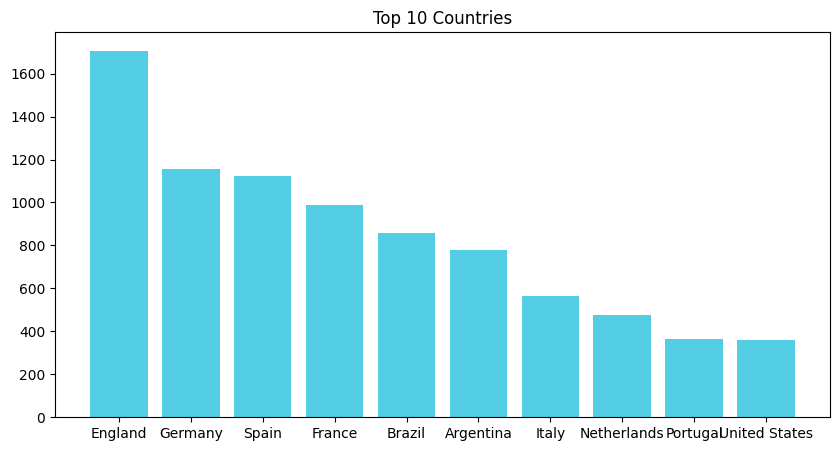

In [14]:
plt.figure(figsize=(10,5))
plt.title('Top 10 Countries')
plt.bar(list(df['Nationality'].value_counts()[0:10].keys()),list(df['Nationality'].value_counts()[0:10]),color='#52CDE3')
plt.show()

# Sort the Player list According to their Salaries 

In [6]:
player_salary = df[['ID', 'Name', 'Wage']]
player_salary = player_salary.sort_values(by='Wage', ascending=False)
player_salary.head(10)

,ID,Name,Wage
9984,234465,A. Araujo,99993
15702,254623,J. Piquerez,99984
9855,233960,L. Mühl,99968
4485,205145,S. Fraser,99963
10545,236492,Pedro Díaz,99955
5642,212218,A. Laporte,99947
9763,233544,K. Malinov,99942
7576,224132,D. Gómez,99938
3027,193862,André Pinto,99935
1935,184222,J. Rask,99928


# Display the Bar Graph of 10 Random Players with their saleries. 

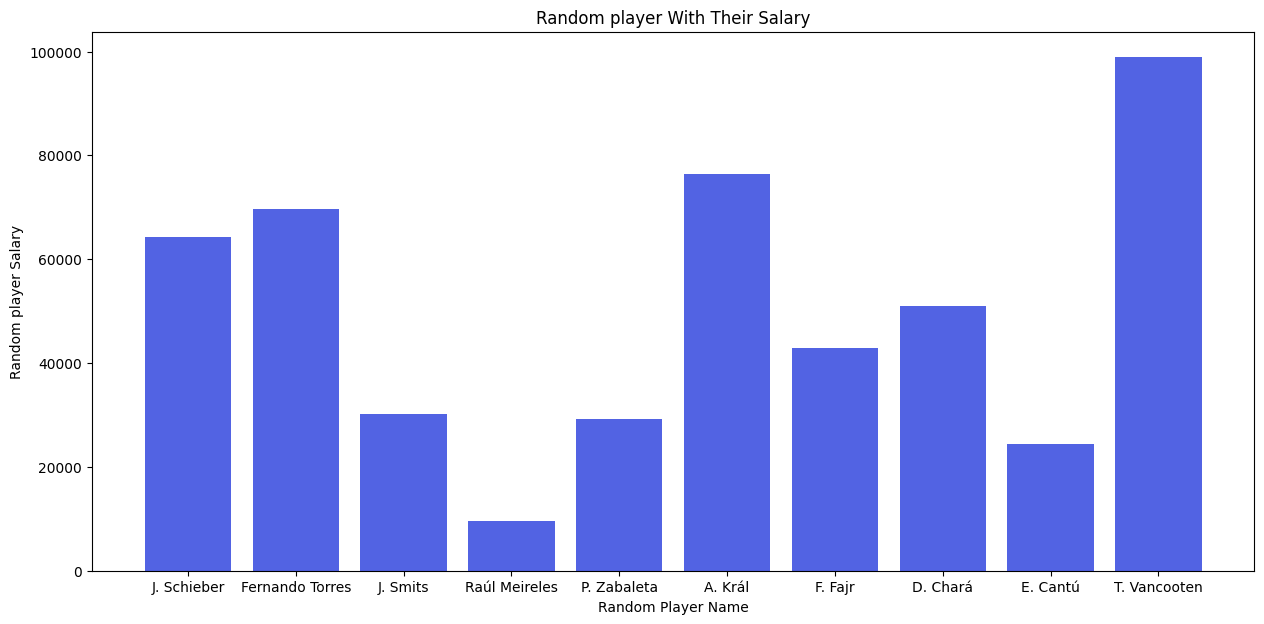

In [111]:
random_id=np.random.randint(0,len(df),size=10)
random_name=df.loc[random_id,'Name']
random_salary=df.loc[random_id,'Wage']

plt.figure(figsize=(15,7))
plt.title('Random player With Their Salary')
plt.xlabel('Random Player Name')
plt.ylabel('Random player Salary')

plt.bar(random_name,random_salary,color='#5263E3')
plt.show()

# Analysis the Data only for Random 10 German countries

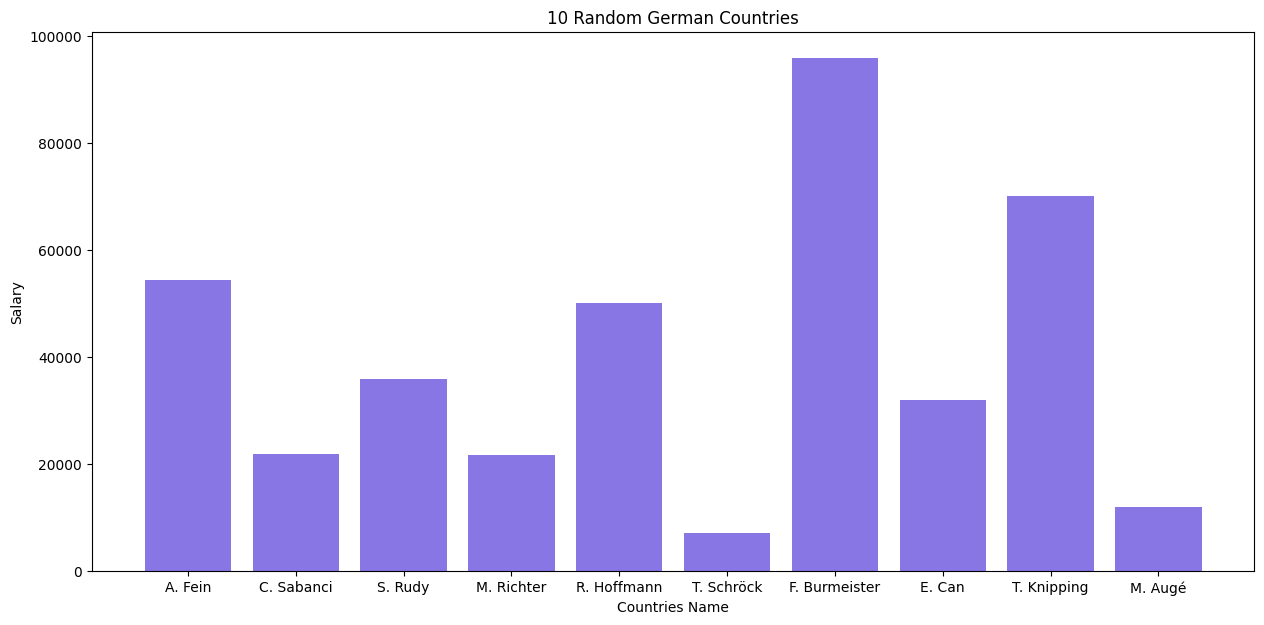

In [69]:
germany=df[df['Nationality']=='Germany']
# germany=germany[['ID','Name','Wage']]
# germany=germany.sort_values(by='Wage',ascending=False)
# germany.reset_index(drop=True, inplace=True)
germany_random_id=np.random.choice(germany.index,size=10,replace=True)
germany_name=germany.loc[germany_random_id,'Name']
germany_wage=germany.loc[germany_random_id,'Wage']

plt.figure(figsize=(15,7))
plt.title('10 Random German Countries')
plt.xlabel('Countries Name')
plt.ylabel('Salary')
plt.bar(germany_name,germany_wage,color='#8876E5')
plt.show()

# Converting the Date column into year, month and day Column

In [107]:
#Remove Rows With Null DOB cell
df = df[pd.notna(df['DOB'])]

#Changing the Datatype of the DOB column 
df['DOB']=pd.to_datetime(df['DOB'])

#Seprate the DOB column into day,month and year
df['year']=df['DOB'].dt.year
df['month']=df['DOB'].dt.month
df['day']=df['DOB'].dt.day

#Display the dataframe
df[['ID','Name','DOB','day','month','year']].head()

,ID,Name,DOB,day,month,year
0,2,G. Pasquale,2008-07-01,1,7,2008
1,16,Luis García,2014-07-19,19,7,2014
2,27,J. Cole,2016-01-07,7,1,2016
4,41,Iniesta,2018-07-16,16,7,2018
5,61,D. Odonkor,2011-01-01,1,1,2011


In [123]:
df['Team & Contract'].head()
df[['Team','Contract']]=df['Team & Contract'].str.extract(r'^(.*?) (\d{4} ~ \d{4})$', expand=True)
df[['Team & Contract','Team','Contract']].head()

,Team & Contract,Team,Contract
0,Udinese 2008 ~ 2016,Udinese,2008 ~ 2016
1,KAS Eupen 2014 ~ 2019,KAS Eupen,2014 ~ 2019
2,Coventry City 2016 ~ 2020,Coventry City,2016 ~ 2020
4,Vissel Kobe 2018 ~ 2021,Vissel Kobe,2018 ~ 2021
5,Alemannia Aachen 2011 ~ 2012,Alemannia Aachen,2011 ~ 2012
